<a href="https://colab.research.google.com/github/TMA040685/GravBolg/blob/main/GW_%C3%98velse_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduktion
De data som vi skal arbejde med indeholder det som kaldes ***Strain***. Strain for tyngdebølger (herefter betegnet med GW for gravitational wave).

$$ h = \frac{\Delta d}{d} = \frac{\mathrm{ change~in~relative~position}}{\mathrm{separation}} $$

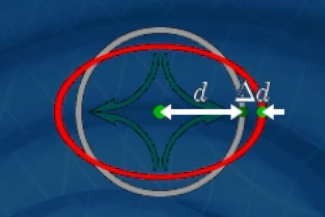

## Formålet med denne øvelse
Denne øvelse vil lære dig de basale færdigheder i forhold til at:

1.   Finde data
2.   Hente data online
3.   Indlæse data

Alt dette kan gøres ved brug af LIGO/Virgo Open Science Centers hjemmeside.

Vi vil dog gøre det i Python for at lætte arbejdet.

---

# Vigtige Python moduler




In [2]:
# Standard python numerisk analyse import:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import h5py
import json
import sys

# Hvis du anvender et python script istedet for en Notebook skal 
# nedenstående udkommateres.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

pyversion = sys.version_info.major
if pyversion == 2:
  import urllib2
else:
  import urllib.request

# -- Smart funktion til at downloade en fil og returnere filnavnet.
def download(url):
  filename = url.split('/')[-1]
  print('Downloading ' + url)
  if pyversion == 2:
    r = urllib2.urlopen(url).read()
    f = open(filename, 'w')         # Write it to the right filename
    f.write(r)
    f.close()
  else:
    urllib.request.urlretrieve(url, filename)
  print("File download complete")
  return filename

# Lad os hente en datafil

In [3]:
# -- Brug Url'en til en data fil fx. https://losc.ligo.org/archive/data/O1/1125122048/H-H1_LOSC_4_V1-1126076416-4096.hdf5
url = 'https://losc.ligo.org/archive/data/O1/1125122048/H-H1_LOSC_4_V1-1126076416-4096.hdf5'
filename = url.split('/')[-1]
download(url)

File download complete


'H-H1_LOSC_4_V1-1126076416-4096.hdf5'

## Lad os nu plotte en kort tidsserie
I koden herunder sker der følgende

1.   Anvender `read.ligo.loaddata()` metoden til at indlæse en tidsvektor og en strain vektor fra den fil vi lige har hentet.
    *  **HINT:** see hvordan man anvender *loaddata()* metoden her: [https://losc.ligo.org/tutorial04/](https://losc.ligo.org/tutorial04/)

2.   Plot Strain som funktion af tid for 1000 punkter
    *   **HINT:** Et kodeeksempel kan findes i bunden af siden: [https://losc.ligo.org/tutorial02/](https://losc.ligo.org/tutorial02/)








File download complete


/content/readligo.py:155: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  shortnameArray = dqInfo['DQShortnames'].value
/content/readligo.py:161: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  injnameArray = injInfo['InjShortnames'].value
/content/readligo.py:166: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  gpsStart = meta['GPSstart'].value


Text(0, 0.5, 'H1 Strain')

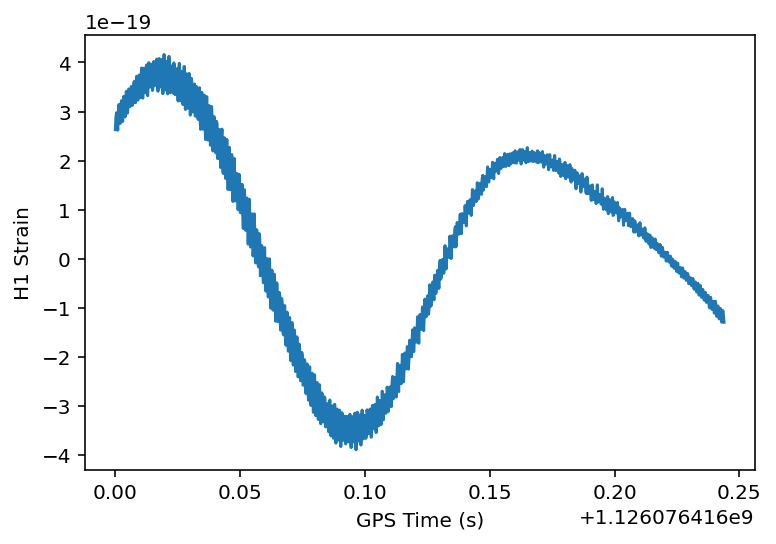

In [5]:
download('https://losc.ligo.org/s/sample_code/readligo.py')
import readligo as rl

# -- Anvend loaddata() metoden til at indlæse strain data.
strain, time, dq = rl.loaddata(filename, 'H1')

# -- Plot de første 1000 punkter af strain mod tid her
numSamples = 1000
plt.plot(time[0:numSamples], strain[0:numSamples])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')

# Vi skal nu lave et Power Spectrum Density (PSD)
LIGO data indeholder støj som er meget afhængig af frekvenser. Derfor skal vi nu se om vi kan lave en filtrering vha et POWER SPEKTRUM

1.   Se herunder hvordan man laver et PSD for 128 sekunder LIGO data
  *   **HINT:** See eksempler her: [https://losc.ligo.org/plot_gallery/](https://losc.ligo.org/plot_gallery/)



Text(0.5, 0, 'Frekvens [Hz]')

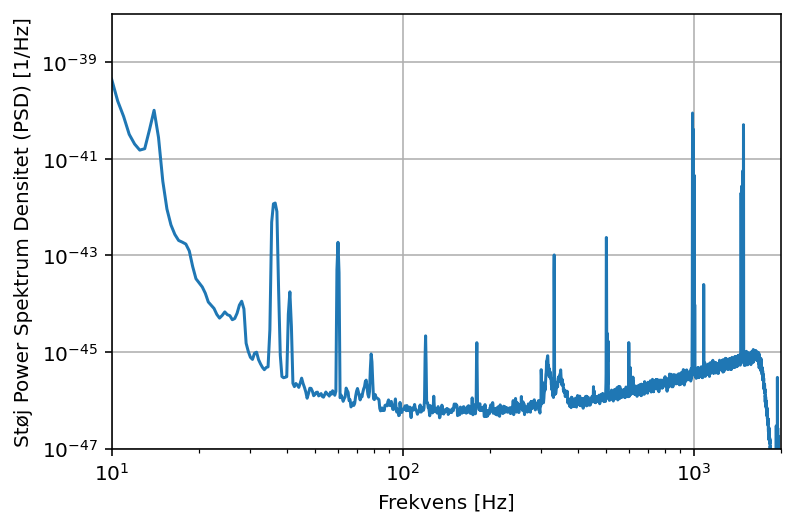

In [6]:
# -- Plot et PSD med 128 sekunders data
ts = time[1] - time[0]              # -- Tiden mellem datapunkter
fs = int(1.0 / ts)                  # -- Samplings frekvensen
length = 128                        # -- Antallet af sekunder

strain_seg = strain[0:(length*fs)]
time_seg = time[0:(length*fs)]

Pxx, freqs = mlab.psd(strain_seg, Fs=fs, NFFT=2*fs)
plt.loglog(freqs,Pxx)
plt.axis([10,2000,1e-47,1e-38])
plt.grid('on')
plt.ylabel('Støj Power Spektrum Densitet (PSD) [1/Hz]')
plt.xlabel('Frekvens [Hz]')

---
### Tjek din forståelse af PSD'et
1. Hvad er de stærkeste linje features i ovenstående PSD?
  *  **HINT:** Se noterne om O1 spektrallinjer: [https://losc.ligo.org/o1speclines](https://losc.ligo.org/o1speclines)
2. Hvad er det mest følsomme frekvens bånd på LIGO?
3. Hvad er støj-power forholdet ved 20 Hz sammenholdt med ved 100 Hz?
4. Hvad er den almindelige bredbånds støj givere ved lave frekvenser f < 50 Hz og ved høje frekvenser f > 300 Hz?

# Oprens GW150914
1. Download en datafil som indeholder data for GW150914
  * **HINT:** GPS 1126259462.4
2. Oprens og fitrer (band-pass) dataene
  * **HINT:** Se en hurtig tutorial her: [https://github.com/losc-tutorial/quickview/blob/master/index.ipynb](https://github.com/losc-tutorial/quickview/blob/master/index.ipynb)
3. Plot de oprensede og filtrerede tidsserie data. Ser du signalet?

File download complete


/content/readligo.py:155: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  shortnameArray = dqInfo['DQShortnames'].value
/content/readligo.py:161: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  injnameArray = injInfo['InjShortnames'].value
/content/readligo.py:166: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  gpsStart = meta['GPSstart'].value


Text(0.5, 1.0, 'Rensede data')

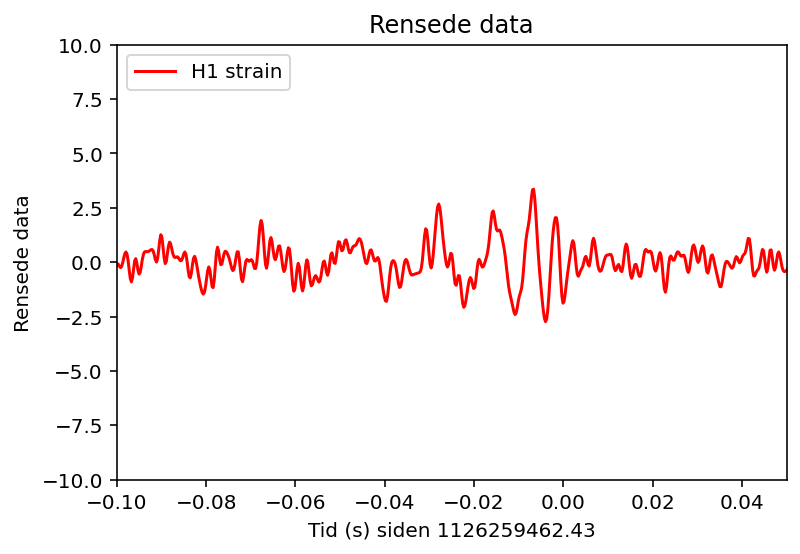

In [12]:
# -- Download en datafil som indeholder GW150914
url = 'https://losc.ligo.org/s/events/GW150914/H-H1_LOSC_4_V2-1126259446-32.hdf5'
fn_150914 = download(url)
strain, time, shan_dict_H1 = rl.loaddata(fn_150914, 'H1')

# Tids sampling intervallet (uniformt samplet!)
t0 = 1126259462.43
dt = time[1] - time[0]
fs = int(np.round(1/dt))
rel_time = time - t0

# -- Hvor meget data skal der bruges til vores Ampletude Spektrum densitet (ASD)?
deltat = 15               # Antallet af sekunder på hver side af data
N_samp = deltat*fs
# -- Centrer vores PSD segment på den adspurgte tid
indx = np.where(np.abs(rel_time) < dt) [0][0]
strain_seg = strain[indx-N_samp : indx+N_samp]
time_seg = rel_time[indx-N_samp : indx+N_samp]

# -- Antallet af punkter til vores FFT (fast fourier transform):
NFFT = 1*fs
fmin = 10
fmax = 2000

# -- Beregn vores PSD
Pxx, freqs = mlab.psd(strain_seg, Fs = fs, NFFT = NFFT, noverlap = NFFT/2, window = np.blackman(NFFT))

# -- Vi anvender nu interpolation af ASD'en beregnet ovenfor til oprensning 
psd = interp1d(freqs, Pxx)

# -- Oprensning
def whiten(strain, interp_psd, dt):
  Nt = len(strain)
  freqs = np.fft.rfftfreq(Nt, dt)

  # -- Oprensning: Transformer til frekvens området, og divider med ASD 
  # derefter transformer tilbage. Pas på at normliseringen bliver rigtig.
  hf = np.fft.rfft(strain)
  white_hf = hf / (np.sqrt(interp_psd(freqs) /dt/ 2.))
  white_ht = np.fft.irfft(white_hf, n = Nt)
  return white_ht

# -- Nu kan vi rense data
strain_whiten = whiten(strain_seg, psd,dt)

# -- Vi mangler at undertrykke de høje frekvenser vha. et band-pass filter
high_freq = 600.
low_freq = 30.
bb, ab = butter(4, [low_freq*2./fs, high_freq*2./fs], btype='band')
strain_whitenbp = filtfilt(bb, ab, strain_whiten)

# -- PLOT resultatet af oprensningen
fig2 = plt.figure()
plt.plot(time_seg, strain_whitenbp, 'r', label='H1 strain')

plt.xlim([-0.1,0.05])
plt.ylim([-10,10])
plt.xlabel('Tid (s) siden '+str(t0))
plt.ylabel('Rensede data')
plt.legend(loc='upper left')
plt.title('Rensede data')

---
# Tillykke du har nu gennemført den første Øvelse.
Dermed er du nu klar til at begynde på den næste øvelse hvor vi vil arbejde videre på det grundlag du nu har for at arbejde med GW.

---
